In [40]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, jaccard_score

y_true = Y_test.flatten()        
y_pred = (predictions > 0.5).astype(np.uint8).flatten()  

# 1. Mean IoU (Jaccard Index)
iou = jaccard_score(y_true, y_pred, average='micro')
print(f"Mean IoU: {iou:.4f}")

# 2. Accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# 3. Precision and Recall
precision = precision_score(y_true, y_pred, average='binary', pos_label=1)
recall = recall_score(y_true, y_pred, average='binary', pos_label=1)
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

Mean IoU: 0.8400
Accuracy: 91.30%
Precision: 0.8239
Recall: 0.7943


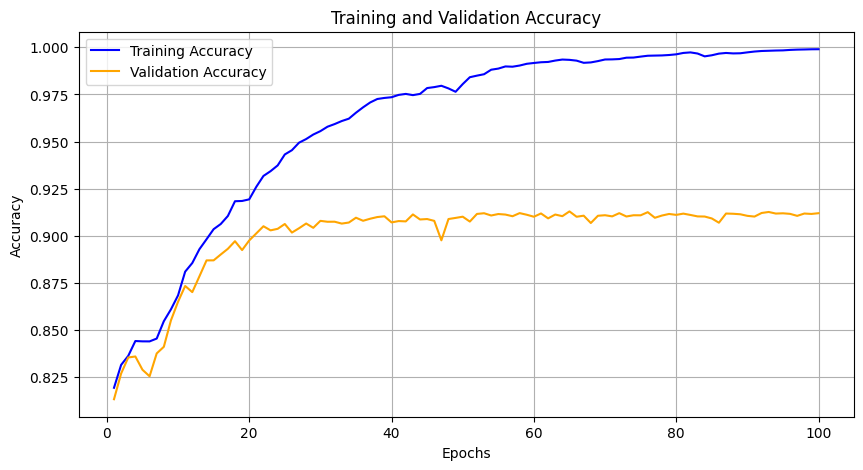

In [41]:
import matplotlib.pyplot as plt

# Assuming `history` is the object returned by `model.fit()`
# Example:
# history = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=50, batch_size=4)

# Extract training and validation accuracy from the history object
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Get the number of epochs
epochs = range(1, len(train_accuracy) + 1)

# Plot training and validation accuracy
plt.figure(figsize=(10, 5))

# Plot training accuracy
plt.plot(epochs, train_accuracy, label='Training Accuracy', color='blue')

# Plot validation accuracy
plt.plot(epochs, val_accuracy, label='Validation Accuracy', color='orange')

# Add labels and title
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

In [42]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, jaccard_score

# Helper function to flatten masks
def flatten_masks(masks):
    """
    Flattens binary masks for evaluation.

    Parameters:
        masks (numpy.ndarray): Binary masks.

    Returns:
        numpy.ndarray: Flattened binary masks.
    """
    return masks.flatten().astype(np.uint8)

# Helper function to calculate metrics
def calculate_metrics(Y_true, Y_pred):
    """
    Calculates evaluation metrics (IoU, Accuracy, Precision, Recall).

    Parameters:
        Y_true (numpy.ndarray): Ground truth masks.
        Y_pred (numpy.ndarray): Predicted masks.

    Returns:
        dict: Dictionary containing IoU, Accuracy, Precision, and Recall.
    """
    # Flatten masks
    gt_flat = flatten_masks(Y_true)
    pred_flat = flatten_masks(Y_pred)

    # Calculate metrics
    iou = jaccard_score(gt_flat, pred_flat, average='binary')
    accuracy = accuracy_score(gt_flat, pred_flat)
    precision = precision_score(gt_flat, pred_flat, average='binary', pos_label=1)
    recall = recall_score(gt_flat, pred_flat, average='binary', pos_label=1)

    return {
        "IoU": iou,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall
    }

# Generate predictions for the test set
predictions_test = model.predict(X_test)
predictions_test = (predictions_test > 0.5).astype(np.uint8)  # Threshold predictions

# Calculate metrics for the test set
test_metrics = calculate_metrics(Y_test, predictions_test)

# Print test metrics
print("\nTest Metrics:")
for metric, value in test_metrics.items():
    print(f"{metric}: {value:.4f}")

# Extract validation data from training data (based on validation_split=0.2)
val_split = 0.2
num_train_samples = len(X_train)
num_val_samples = int(val_split * num_train_samples)

# Split into training and validation sets
X_train_final = X_train[:-num_val_samples]
Y_train_final = Y_train[:-num_val_samples]
X_val = X_train[-num_val_samples:]
Y_val = Y_train[-num_val_samples:]

# Generate predictions for the validation set
predictions_val = model.predict(X_val)
predictions_val = (predictions_val > 0.5).astype(np.uint8)  # Threshold predictions

# Calculate metrics for the validation set
val_metrics = calculate_metrics(Y_val, predictions_val)

# Print validation metrics
print("\nValidation Metrics:")
for metric, value in val_metrics.items():
    print(f"{metric}: {value:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 709ms/step

Test Metrics:
IoU: 0.6790
Accuracy: 0.9130
Precision: 0.8239
Recall: 0.7943
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step

Validation Metrics:
IoU: 0.6757
Accuracy: 0.9120
Precision: 0.8220
Recall: 0.7915


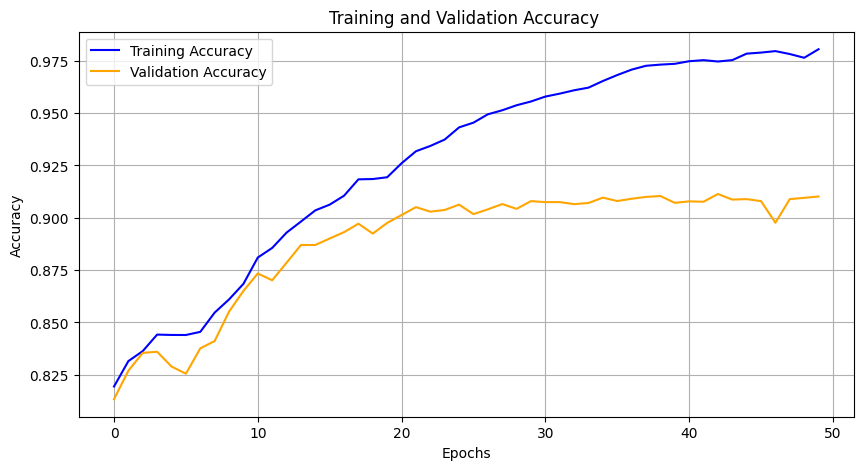

In [50]:
import matplotlib.pyplot as plt

# Plot only the first 50 epochs
epochs_to_plot = 50

plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'][:epochs_to_plot], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'][:epochs_to_plot], label='Validation Accuracy', color='orange')
plt.title('Training and Validation Accuracy ')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


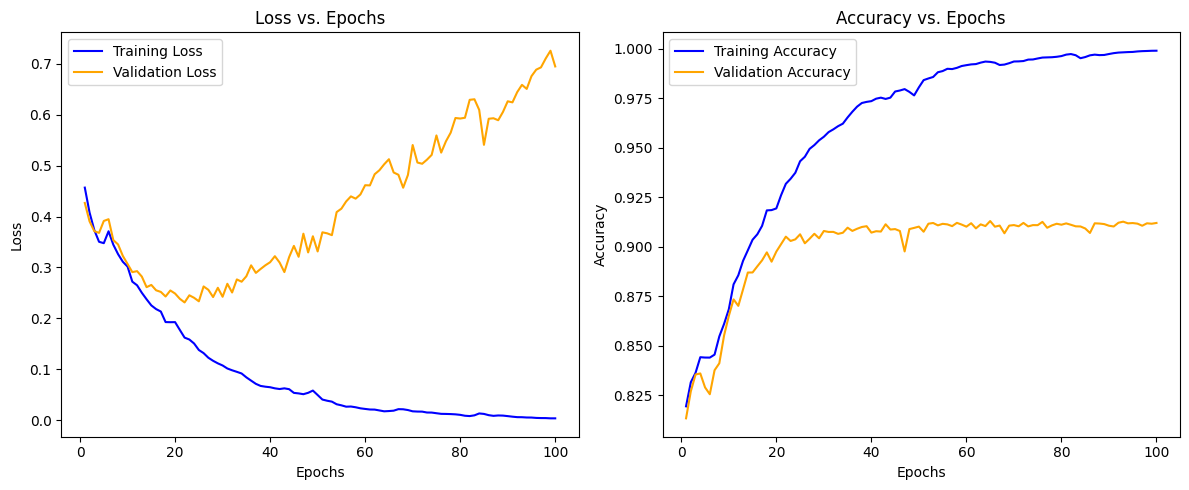

In [51]:
import matplotlib.pyplot as plt

# Extract loss and accuracy
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(loss) + 1)

# Plot loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'b-', label='Training Loss')
plt.plot(epochs, val_loss, 'orange', label='Validation Loss')
plt.title('Loss vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, acc, 'b-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'orange', label='Validation Accuracy')
plt.title('Accuracy vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


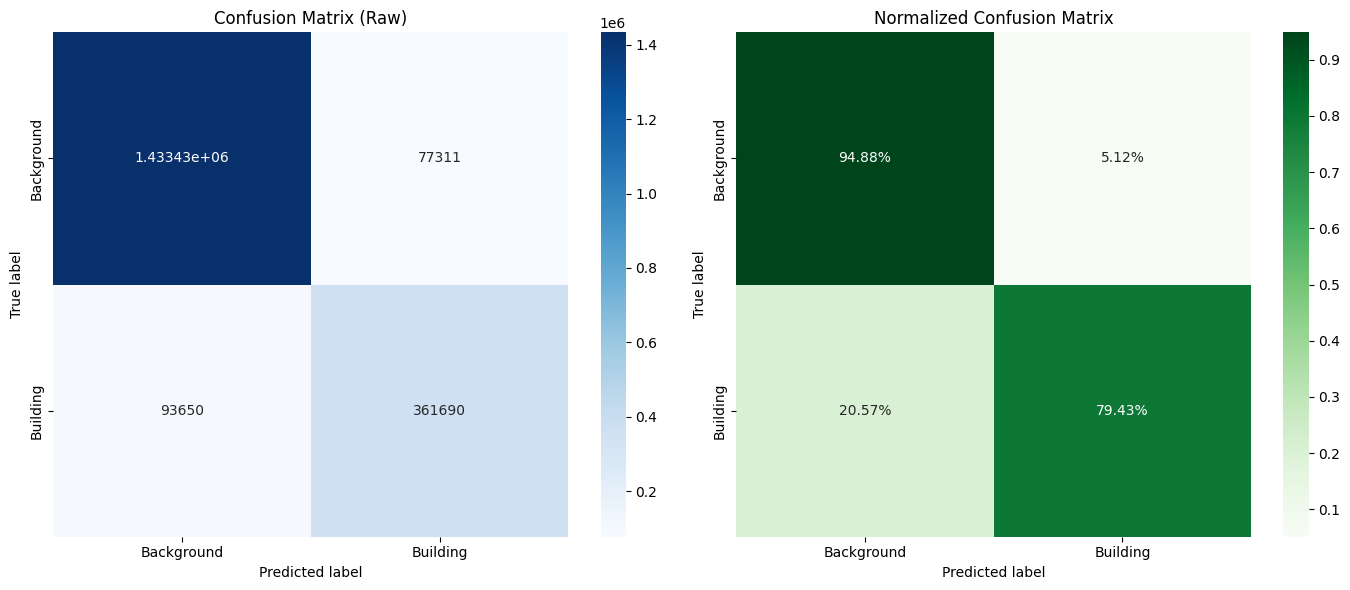

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


labels = ['Background', 'Building']

# Confusion matrices
cm = confusion_matrix(y_true, y_pred)
cm_norm = confusion_matrix(y_true, y_pred, normalize='true')

# Plot side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Raw Confusion Matrix
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=labels, yticklabels=labels, ax=axes[0])
axes[0].set_title('Confusion Matrix (Raw)')
axes[0].set_xlabel('Predicted label')
axes[0].set_ylabel('True label')

# Normalized Confusion Matrix
sns.heatmap(cm_norm, annot=True, fmt='.2%', cmap='Greens', xticklabels=labels, yticklabels=labels, ax=axes[1])
axes[1].set_title('Normalized Confusion Matrix')
axes[1].set_xlabel('Predicted label')
axes[1].set_ylabel('True label')

plt.tight_layout()
plt.show()
